### This notebook tries to analyse the application_data in group by approach
### Profilling customer_ID into different blocks for better undersating.
The profile blocks identified for the analysis are:
   - 1. **Document_wise:** 
   - 2. **House_info_wise:** 
   - 3. **Region_wise_info:**
   - 4. **Social_circle_info:**
   - 5. **Contact_wise_info:**
   - 6. **Asset_details_info:**
   - 7. **Family_wise_info:**
   - 8. **Education:** 

In [1]:
# importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read Data
This dataset has 3 files as explained below:
1. `application_data.csv` contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.
2. `previous_application.csv` contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.
3. `columns_description.csv` is data dictionary which describes the meaning of the variables.

# Becoming One With the Data:


In [2]:
application_data_df = pd.read_csv("/Users/anurag/Desktop/Anurag_Koushal_Appinventiv_Submission/Assignment_2/Anurag_Koushal_Appinventiv/dataset/application_data.csv")

In [3]:
application_data_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
application_data_df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [5]:
application_data_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
application_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
application_data_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [8]:
print(application_data_df.shape)

(307511, 122)


Note: There are 121 features, 1 target variable, and 307511 rows available in `application_data`

In [9]:
# listing down all coulmn name in dataframe
list(application_data_df.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

## Data Imbalance before data_transformation

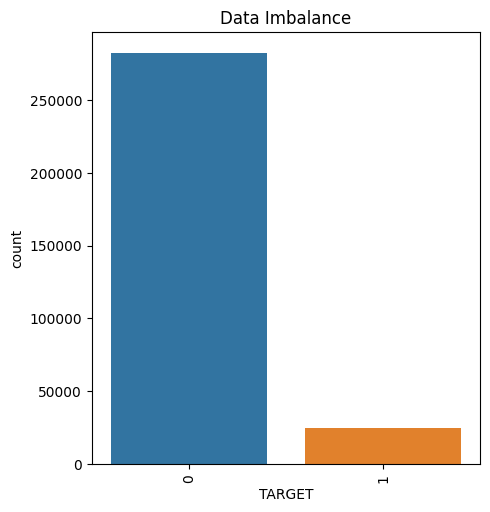

In [10]:
plt.figure(figsize=(5,5))
sns.countplot(x='TARGET',data=application_data_df)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Data Imbalance")
plt.show()

In [11]:
non_default  = application_data_df[application_data_df["TARGET"] == 0]
default  = application_data_df[application_data_df["TARGET"] == 1]

print("Number of defaulters present: ", default.shape[0])
print("Number of non-defaulters present: ", non_default.shape[0])

Number of defaulters present:  24825
Number of non-defaulters present:  282686


In [12]:
non_default

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0


In [13]:
print("Percentage of defaulters: ", default.shape[0]*100/(default.shape[0]+non_default.shape[0]))
print("Percentage of non-defaulters: ", non_default.shape[0]*100/(default.shape[0]+non_default.shape[0]))

Percentage of defaulters:  8.072881945686495
Percentage of non-defaulters:  91.92711805431351


In [14]:
def missingdata_percentage(df):
    missing = pd.DataFrame(columns=['category','percentage'])
    for col in df.columns:
        if df[col].isna().values.any():
            percentage = 100*df[col].isna().sum()/df.shape[0]
            missing = missing.append({'category' : col, 'percentage' : percentage}, ignore_index=True)
    return missing

In [15]:
def value_wise_defaulter_percentage(df, col):
    new_df = pd.DataFrame(columns=['Value', 'Percentage of Defaulter'])
    
    for value in df[col].unique():
        default_cnt = df[(df[col] == value) & (df.TARGET == 1)].shape[0]
        total_cnt = df[df[col] == value].shape[0]
        new_df = new_df.append({'Value' : value , 'Percentage of Defaulter' : (default_cnt*100/total_cnt)}, ignore_index=True)
    return new_df.sort_values(by='Percentage of Defaulter', ascending=False)

# House_wise_info :
steps:
1. create dataframe with housing_wise_info
2. find missing data percentage(ordered)
3. visualise against the Target values.
4. report insights.

In [16]:
# finding starting and ending index values
start_index = application_data_df.columns.get_loc("APARTMENTS_AVG") 
end_index = application_data_df.columns.get_loc("EMERGENCYSTATE_MODE")

In [17]:
print(start_index)
print(end_index)

44
90


In [18]:
#STEP 1: creating house_wise_info dataframe
house_wise_info = application_data_df.iloc[:, start_index:end_index+1]

In [19]:
# adding `NAME_HOUSING_TYPE` and `TARGET` coulmn to the house_wise_info
house_wise_info['NAME_HOUSING_TYPE'] = application_data_df["NAME_HOUSING_TYPE"]
house_wise_info['TARGET'] = application_data_df["TARGET"]

In [20]:
house_wise_info.tail()

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,...,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,NAME_HOUSING_TYPE,TARGET
307506,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,...,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No,With parents,0
307507,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,...,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No,House / apartment,0
307508,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,...,0.9445,0.0000,0.0000,reg oper account,block of flats,0.7970,Panel,No,House / apartment,0
307509,0.0124,NaN,0.9771,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,...,0.0062,NaN,NaN,NaN,block of flats,0.0086,"Stone, brick",No,House / apartment,1
307510,0.0742,0.0526,0.9881,NaN,0.0176,0.08,0.0690,0.3750,NaN,NaN,...,0.0805,NaN,0.0000,NaN,block of flats,0.0718,Panel,No,House / apartment,0


In [21]:
house_wise_info.isna().sum()

APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BUILD_MODE                204488
COMMONAREA_MODE                 214865
ELEVATORS_MODE                  163891
ENTRANCES_MODE                  154828
FLOORSMAX_MODE                  153020
FLOORSMIN_MODE                  208642
LANDAREA_MODE                   182590
LIVINGAPARTMENTS_MODE           210199
LIVINGAREA_MODE          

In [22]:
house_wise_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 49 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   APARTMENTS_AVG                151450 non-null  float64
 1   BASEMENTAREA_AVG              127568 non-null  float64
 2   YEARS_BEGINEXPLUATATION_AVG   157504 non-null  float64
 3   YEARS_BUILD_AVG               103023 non-null  float64
 4   COMMONAREA_AVG                92646 non-null   float64
 5   ELEVATORS_AVG                 143620 non-null  float64
 6   ENTRANCES_AVG                 152683 non-null  float64
 7   FLOORSMAX_AVG                 154491 non-null  float64
 8   FLOORSMIN_AVG                 98869 non-null   float64
 9   LANDAREA_AVG                  124921 non-null  float64
 10  LIVINGAPARTMENTS_AVG          97312 non-null   float64
 11  LIVINGAREA_AVG                153161 non-null  float64
 12  NONLIVINGAPARTMENTS_AVG       93997 non-null

In [23]:
house_wise_missing = missingdata_percentage(house_wise_info)
house_wise_missing

,category,percentage
0,APARTMENTS_AVG,50.749729
1,BASEMENTAREA_AVG,58.515956
2,YEARS_BEGINEXPLUATATION_AVG,48.781019
3,YEARS_BUILD_AVG,66.497784
4,COMMONAREA_AVG,69.872297
5,ELEVATORS_AVG,53.295980
6,ENTRANCES_AVG,50.348768
7,FLOORSMAX_AVG,49.760822
8,FLOORSMIN_AVG,67.848630
9,LANDAREA_AVG,59.376738


In [24]:
#STEP 2: Finding missing data percentage(ordered)
house_wise_missing.sort_values("percentage", ascending=False)

,category,percentage
32,COMMONAREA_MEDI,69.872297
4,COMMONAREA_AVG,69.872297
18,COMMONAREA_MODE,69.872297
26,NONLIVINGAPARTMENTS_MODE,69.432963
40,NONLIVINGAPARTMENTS_MEDI,69.432963
12,NONLIVINGAPARTMENTS_AVG,69.432963
42,FONDKAPREMONT_MODE,68.386172
38,LIVINGAPARTMENTS_MEDI,68.354953
24,LIVINGAPARTMENTS_MODE,68.354953
10,LIVINGAPARTMENTS_AVG,68.354953


 NOTE: The number of missing values(>47.398 percent) for house_wise_info is very high for the above resulted catogeries.
 So, these columns can be dropped.

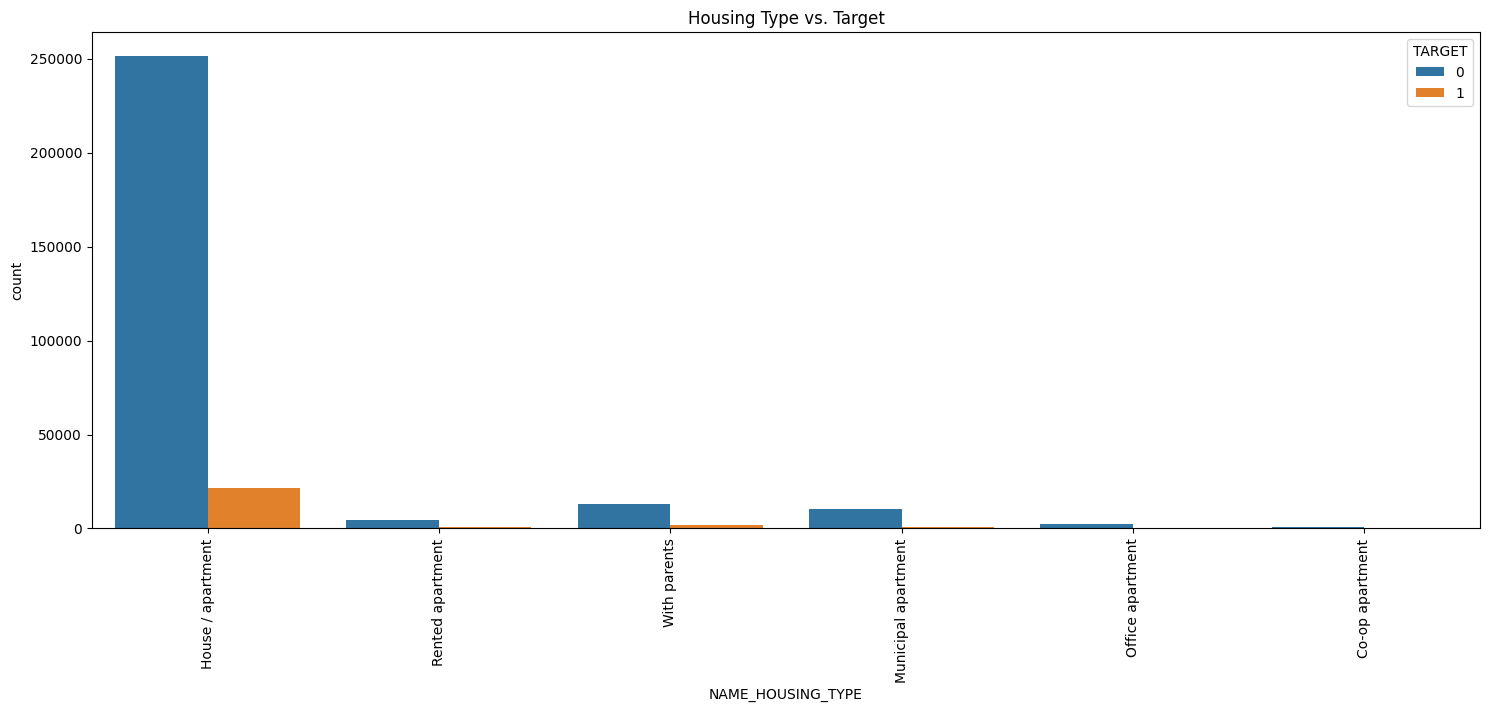

In [25]:
#STEP 3: Visualising against the Target values.
plt.figure(figsize=(15,7))
sns.countplot(x=application_data_df["NAME_HOUSING_TYPE"], hue=application_data_df["TARGET"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Housing Type vs. Target")
plt.show()

In [26]:
# STEP 4: Reporting insights
value_wise_defaulter_percentage(application_data_df, 'NAME_HOUSING_TYPE')

,Value,Percentage of Defaulter
1,Rented apartment,12.313051
2,With parents,11.698113
3,Municipal apartment,8.539748
5,Co-op apartment,7.932264
0,House / apartment,7.795711
4,Office apartment,6.572411


### INSIGHT: 
> The number of people living in house/apartment are highest.

> The chances of defaulting is found **highest** in people living in `Rented apartment` and **Second higesht** in people living `with parents`

# Social_circle_info :
steps:
1. create dataframe with social_circle_info
2. find missing data percentage(ordered)
3. visualise against the Target values.
4. report insights.

In [27]:
# finding starting and ending index values
start_index = application_data_df.columns.get_loc('OBS_30_CNT_SOCIAL_CIRCLE')
end_index = application_data_df.columns.get_loc('DEF_60_CNT_SOCIAL_CIRCLE')

In [28]:
print(start_index)
print(end_index)

91
94


In [29]:
#STEP 1: creating house_wise_info dataframe
social_circle_info = application_data_df.iloc[:, start_index:end_index+1]

In [30]:
social_circle_info.head()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,2.0,2.0,2.0,2.0
1,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0
3,2.0,0.0,2.0,0.0
4,0.0,0.0,0.0,0.0


In [31]:
social_circle_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   OBS_30_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 1   DEF_30_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 2   OBS_60_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 3   DEF_60_CNT_SOCIAL_CIRCLE  306490 non-null  float64
dtypes: float64(4)
memory usage: 9.4 MB


In [32]:
social_circle_missing = missingdata_percentage(social_circle_info)
social_circle_missing

,category,percentage
0,OBS_30_CNT_SOCIAL_CIRCLE,0.332021
1,DEF_30_CNT_SOCIAL_CIRCLE,0.332021
2,OBS_60_CNT_SOCIAL_CIRCLE,0.332021
3,DEF_60_CNT_SOCIAL_CIRCLE,0.332021


### Handling Missing Values
> The social_circle_info dataframe is found to have very small percentage of missing values (0.332021 %).
 * Therefore, imputing Columns with `Mode values` for numeric columns is suggested.
 * In case of  continuous numeric columns null value imputation should be done with Median Value

In [33]:
social_circle_info.OBS_30_CNT_SOCIAL_CIRCLE.fillna( social_circle_info.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_30_CNT_SOCIAL_CIRCLE

social_circle_info.DEF_30_CNT_SOCIAL_CIRCLE.fillna( social_circle_info.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_30_CNT_SOCIAL_CIRCLE

social_circle_info.OBS_60_CNT_SOCIAL_CIRCLE.fillna( social_circle_info.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_60_CNT_SOCIAL_CIRCLE

social_circle_info.DEF_60_CNT_SOCIAL_CIRCLE.fillna( social_circle_info.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_60_CNT_SOCIAL_CIRCLE

In [34]:
# verfing imputation
social_circle_missing = missingdata_percentage(social_circle_info)
social_circle_missing

,category,percentage


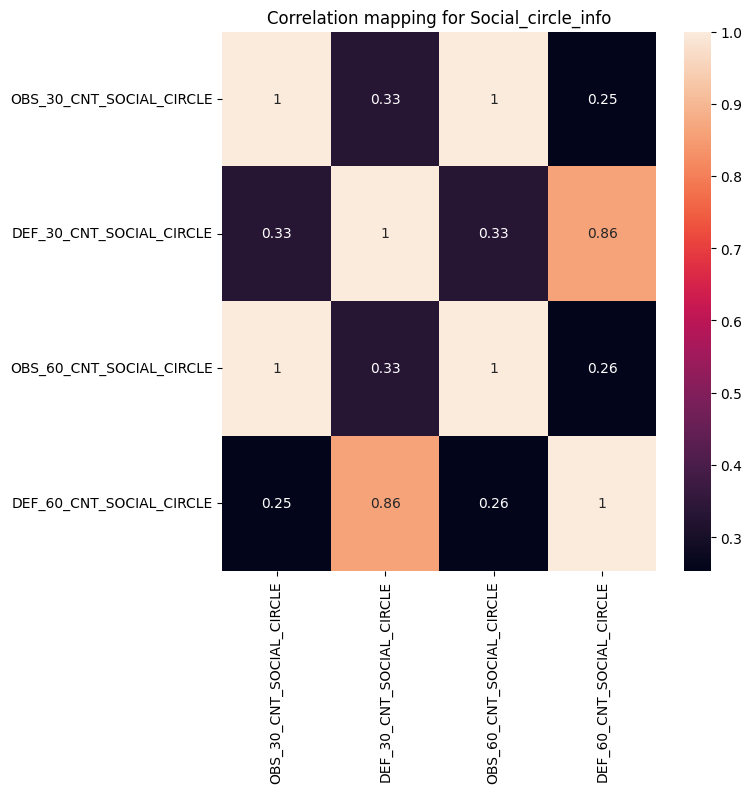

In [35]:
# Calculating correlation between the social_circle_info categories
plt.figure(figsize=(7,7))
plt.title("Correlation mapping for Social_circle_info")
sns.heatmap(social_circle_info.corr(), annot=True)
plt.show();


**NOTE:**
> Very **_high_** degree of correlation is seen for `DEF_30_CNT_SOCIAL_CIRCLE` and `DEF_60_CNT_SOCIAL_CIRCLE` columns. 

> Columns `OBS_30_CNT_SOCIAL_CIRCLE` and `OBS_60_CNT_SOCIAL_CIRCLE` are seen to be identical.

In [36]:
def plot_fig(column_name):
    # figure configuration
    sns.set(style="darkgrid")
    plt.figure(figsize=(15,7))
    
    # plotting for non_defaulters
    plt.subplot(1,2,1)      
    plt.yscale('linear')                              
    sns.histplot(non_default[column_name], color="g" )
    plt.tight_layout()

    #plotting for defaulters
    plt.subplot(1,2,2)  
    plt.yscale('linear')                                                                                                     
    sns.histplot(default[column_name], color="r")   
    plt.xticks(rotation=90)
    plt.show()
    plt.tight_layout()
    
    plt.show();

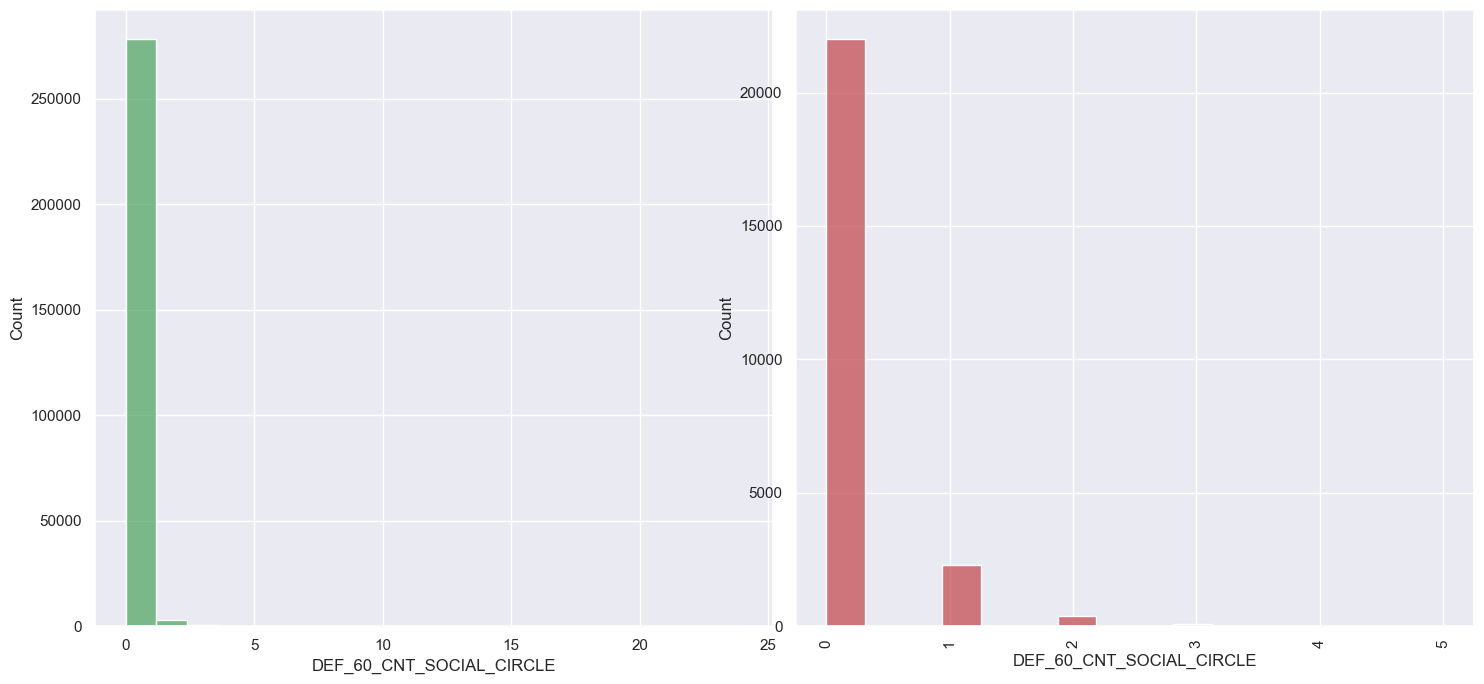

<Figure size 640x480 with 0 Axes>

In [37]:
plot_fig(column_name= 'DEF_60_CNT_SOCIAL_CIRCLE')

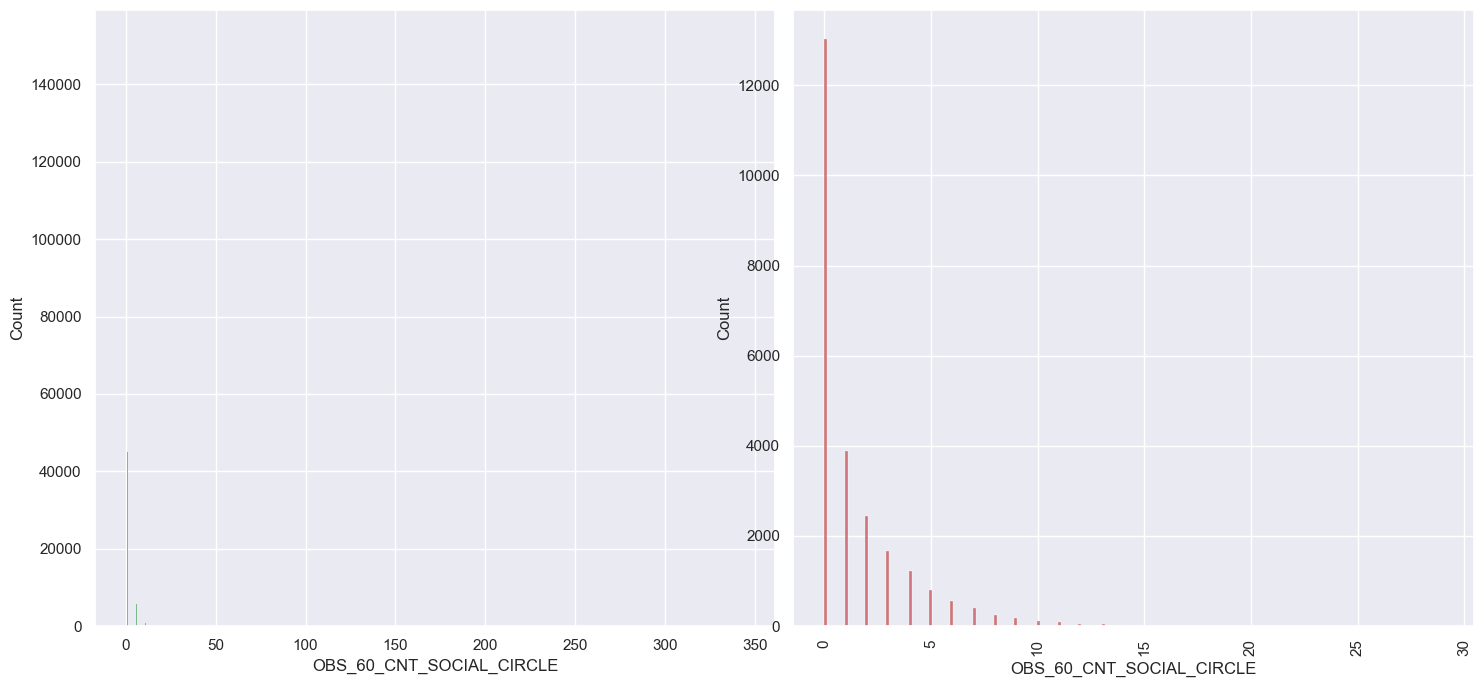

<Figure size 640x480 with 0 Axes>

In [38]:
plot_fig(column_name= 'OBS_60_CNT_SOCIAL_CIRCLE')

**NOTE:**
> A smiliarity in trend is seen for both defaulter and non-defaulter wrt `DEF_60_CNT_SOCIAL_CIRCLE` and `OBS_60_CNT_SOCIAL_CIRCLE` columns

# Contact_wise_info

In [39]:
contact_wise_info = application_data_df[['FLAG_MOBIL',
                                         'FLAG_EMP_PHONE',
                                         'FLAG_WORK_PHONE',
                                         'FLAG_CONT_MOBILE',
                                         'FLAG_PHONE',
                                         'FLAG_EMAIL',
                                         'DAYS_LAST_PHONE_CHANGE', 
                                         'TARGET']]

In [40]:
contact_wise_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   FLAG_MOBIL              307511 non-null  int64  
 1   FLAG_EMP_PHONE          307511 non-null  int64  
 2   FLAG_WORK_PHONE         307511 non-null  int64  
 3   FLAG_CONT_MOBILE        307511 non-null  int64  
 4   FLAG_PHONE              307511 non-null  int64  
 5   FLAG_EMAIL              307511 non-null  int64  
 6   DAYS_LAST_PHONE_CHANGE  307510 non-null  float64
 7   TARGET                  307511 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 18.8 MB


In [41]:
contact_wise_info.head()

,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,DAYS_LAST_PHONE_CHANGE,TARGET
0,1,1,0,1,1,0,-1134.0,1
1,1,1,0,1,1,0,-828.0,0
2,1,1,1,1,1,0,-815.0,0
3,1,1,0,1,0,0,-617.0,0
4,1,1,0,1,0,0,-1106.0,0


In [42]:
missingdata_percentage(contact_wise_info)

,category,percentage
0,DAYS_LAST_PHONE_CHANGE,0.000325


In [43]:
contact_wise_info = application_data_df[['FLAG_MOBIL',
                                         'FLAG_EMP_PHONE',
                                         'FLAG_WORK_PHONE',
                                         'FLAG_CONT_MOBILE',
                                         'FLAG_PHONE',
                                         'FLAG_EMAIL', 
                                         'TARGET']]

In [44]:
contact_wise_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   FLAG_MOBIL        307511 non-null  int64
 1   FLAG_EMP_PHONE    307511 non-null  int64
 2   FLAG_WORK_PHONE   307511 non-null  int64
 3   FLAG_CONT_MOBILE  307511 non-null  int64
 4   FLAG_PHONE        307511 non-null  int64
 5   FLAG_EMAIL        307511 non-null  int64
 6   TARGET            307511 non-null  int64
dtypes: int64(7)
memory usage: 16.4 MB


In [45]:

def corr_matrix_categorical(df,figname):
    df_corr = df.corr()
    mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
    fig, ax = plt.subplots(figsize=(4, 4))
    # mask
    mask = np.triu(np.ones_like(df_corr, dtype=np.bool)) # mapping categorical (0,1)
    # adjust mask and df
    mask = mask[1:, :-1]
    corr = df_corr.iloc[1:,:-1].copy()
    # color map
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    # plot heatmap
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
            linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
            cbar_kws={"shrink": .8}, square=True)
    # ticks
    yticks = [i.upper() for i in corr.index]
    xticks = [i.upper() for i in corr.columns]
    plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
    plt.xticks(plt.xticks()[0], labels=xticks)
    # title
    title = figname
    plt.title(title, loc='left', fontsize=18)
    plt.show()

/Users/anurag/Desktop/Anurag_Koushal_Appinventiv_Submission/Assignment_2/Anurag_Koushal_Appinventiv/enve/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/anurag/Desktop/Anurag_Koushal_Appinventiv_Submission/Assignment_2/Anurag_Koushal_Appinventiv/enve/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np

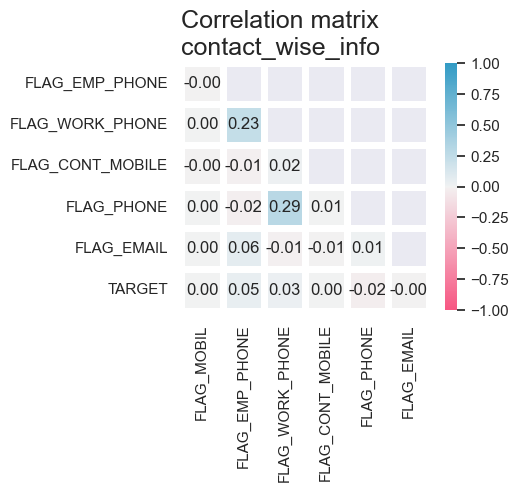

In [46]:
corr_matrix_categorical(contact_wise_info, "Correlation matrix \ncontact_wise_info")

**NOTE:**

> No pattern similarity is found between feature and target. 

> Removing all these features is suggested as the don't seem to be contributing to analysis

# Asset Details

In [47]:
# creating Asset_details dataframe
asset_details = application_data_df[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'OWN_CAR_AGE', 'TARGET']]

In [48]:
asset_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   FLAG_OWN_CAR     307511 non-null  object 
 1   FLAG_OWN_REALTY  307511 non-null  object 
 2   OWN_CAR_AGE      104582 non-null  float64
 3   TARGET           307511 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 9.4+ MB


In [49]:
asset_details.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,OWN_CAR_AGE,TARGET
0,N,Y,NaN,1
1,N,N,NaN,0
2,Y,Y,26.0,0
3,N,Y,NaN,0
4,N,Y,NaN,0


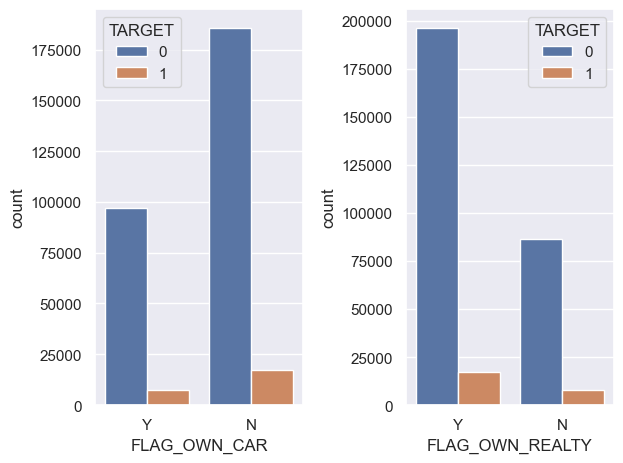

In [50]:
fig = plt.figure()
plt.subplot(121)
sns.countplot(x=application_data_df['FLAG_OWN_CAR'], 
              hue=application_data_df['TARGET'], 
              order=['Y','N'], 
              )
plt.subplot(122)
sns.countplot(x=application_data_df['FLAG_OWN_REALTY'], 
              hue=application_data_df['TARGET'], 
              order=['Y','N'], 
              )
plt.tight_layout()
plt.show()

Comment:

Most of the applicants own realty
Most of the applicants do not own cars
People not owning reality and car and have a slightly higher default rate than the people who own reality and car

In [51]:
value_wise_defaulter_percentage(application_data_df, 'FLAG_OWN_CAR')

,Value,Percentage of Defaulter
0,N,8.500227
1,Y,7.243730


In [52]:
value_wise_defaulter_percentage(application_data_df, 'FLAG_OWN_REALTY')


,Value,Percentage of Defaulter
1,N,8.324929
0,Y,7.961577


Comment:

Most of the applicants own realty
Most of the applicants do not own cars
People not owning reality and car and have a slightly higher default rate than the people who own reality and car

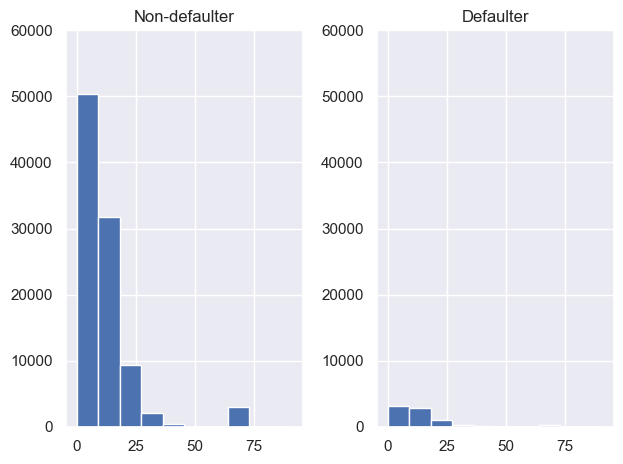

In [53]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,60000), title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,60000), title="Defaulter")

non_default['OWN_CAR_AGE'].hist(bins=10, ax=ax1)
default['OWN_CAR_AGE'].hist(bins=10, ax=ax2)

plt.tight_layout()

plt.show()

Comment:

Defaulter or not, most applicants have car age between 0-25 years.
Since for both target value, trend is similar, this feature can dropped.

###  Family Info

In [54]:
family_info =application_data_df[['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']]

In [55]:
family_info.head()

,CNT_CHILDREN,CNT_FAM_MEMBERS,NAME_FAMILY_STATUS
0,0,1.0,Single / not married
1,0,2.0,Married
2,0,1.0,Single / not married
3,0,2.0,Civil marriage
4,0,1.0,Single / not married


In [56]:
family_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CNT_CHILDREN        307511 non-null  int64  
 1   CNT_FAM_MEMBERS     307509 non-null  float64
 2   NAME_FAMILY_STATUS  307511 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 7.0+ MB


In [57]:
missingdata_percentage(family_info)

,category,percentage
0,CNT_FAM_MEMBERS,0.00065


> drop rows with null values in CNT_FAM_MEMBERS

>family member cannot have fraction convert the datatype to Integer

In [58]:

# dropping the rows(2) with null value in CNT_FAM_MEMBERS
family_info = family_info.dropna(subset=['CNT_FAM_MEMBERS']) 


In [59]:
# verifying
missingdata_percentage(family_info)

,category,percentage


In [60]:
# Since number of family member cannot have fraction, converting to Integer

family_info['CNT_FAM_MEMBERS'] = family_info['CNT_FAM_MEMBERS'].astype(int)
family_info.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   CNT_CHILDREN        307509 non-null  int64 
 1   CNT_FAM_MEMBERS     307509 non-null  int64 
 2   NAME_FAMILY_STATUS  307509 non-null  object
dtypes: int64(2), object(1)
memory usage: 9.4+ MB


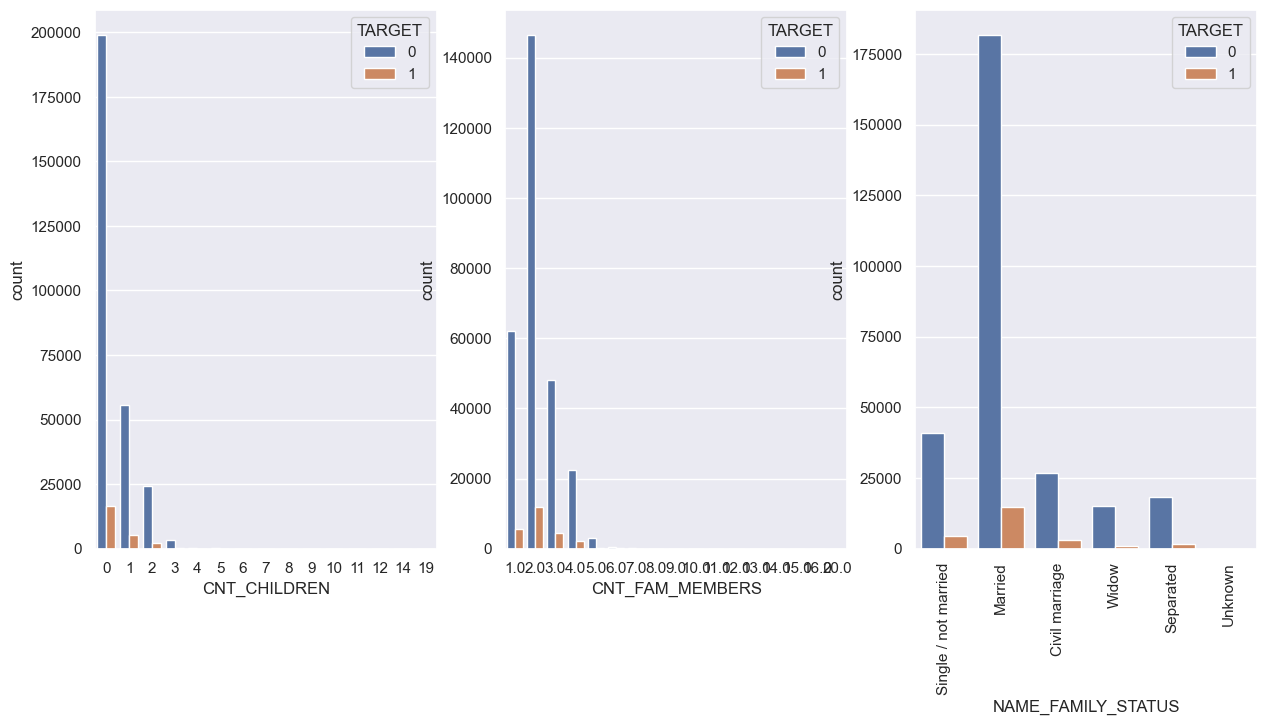

In [61]:
fig = plt.figure(figsize=(15,7))
plt.subplot(131)
sns.countplot(x=application_data_df['CNT_CHILDREN'], 
              hue=application_data_df['TARGET'], 
              )
plt.subplot(132)
sns.countplot(x=application_data_df['CNT_FAM_MEMBERS'], 
              hue=application_data_df['TARGET'], 
              )
plt.subplot(133)
sns.countplot(x=application_data_df['NAME_FAMILY_STATUS'], 
              hue=application_data_df['TARGET'],  
              )
plt.xticks(rotation=90)

plt.show()

Comment:

Default rate is highest for Civil Marriage and Single applicants

Most of the applicants are married (and/or) no children (and/or) 2 family members.

Applicants with relatively more number of children (and/or) family members have higher default percentage.

For some of the cases where count children/family members is high, and the default rate is very high or very low.

This cases cannot be taken as a conclusion as number of applicants having a large family is very low.

## Education and Occupation Info

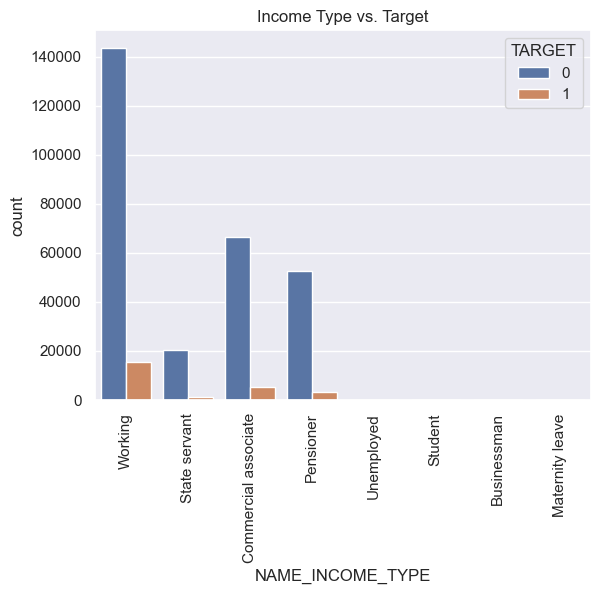

In [62]:
plt.figure()
sns.countplot(x=application_data_df['NAME_INCOME_TYPE'], 
              hue=application_data_df["TARGET"])
plt.xticks(rotation=90)
plt.title("Income Type vs. Target")
plt.show()

In [63]:
value_wise_defaulter_percentage(application_data_df,
                                'NAME_INCOME_TYPE')

,Value,Percentage of Defaulter
7,Maternity leave,40.000000
4,Unemployed,36.363636
0,Working,9.588472
2,Commercial associate,7.484257
1,State servant,5.754965
3,Pensioner,5.386366
5,Student,0.000000
6,Businessman,0.000000


In [64]:
application_data_df.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

**Comment:**
- Most of the applicants are working.
- Applicants on Maternity Leave and Unemployed has highest percentage of Defaulter
- Businessman have lowest (0) percentage of Defaulter
However applicants of income type('Unemployed', 'Student', 'Businessman', 'Maternity leave') are very few in the dataset to contribute in the analysis.

In [65]:
value_wise_defaulter_percentage(application_data_df,'NAME_EDUCATION_TYPE')

,Value,Percentage of Defaulter
3,Lower secondary,10.927673
0,Secondary / secondary special,8.939929
2,Incomplete higher,8.484966
1,Higher education,5.355115
4,Academic degree,1.829268


**Comment:**
- Applicants having "Lower secondary" education have highest percentage of Defaulter.

In [66]:
application_data_df['OCCUPATION_TYPE'].isnull().value_counts()

False    211120
True      96391
Name: OCCUPATION_TYPE, dtype: int64

In [67]:
application_data_df['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [68]:
# Imputing missing value for OCCUPATION TYPE as "Unknown"

application_data_df['OCCUPATION_TYPE'].fillna("Unknown", inplace=True)

In [69]:
value_wise_defaulter_percentage(application_data_df, 'OCCUPATION_TYPE')

,Value,Percentage of Defaulter
14,Low-skill Laborers,17.152413
5,Drivers,11.326130
13,Waiters/barmen staff,11.275964
11,Security staff,10.742449
0,Laborers,10.578770
8,Cooking staff,10.443996
6,Sales staff,9.631799
7,Cleaning staff,9.606705
15,Realty agents,7.856192
16,Secretaries,7.049808


**Comment:**
- Low skilled labourers have very high rate of defaulters in comparison to other occupations

## Region info

In [70]:
start_idx = application_data_df.columns.get_loc('REG_REGION_NOT_LIVE_REGION')
end_idx = application_data_df.columns.get_loc('LIVE_CITY_NOT_WORK_CITY')

region_df = application_data_df.iloc[:, start_idx:end_idx+1]

In [71]:
region_df['REGION_RATING_CLIENT'] = application_data_df['REGION_RATING_CLIENT']
region_df['REGION_RATING_CLIENT_W_CITY'] = application_data_df['REGION_RATING_CLIENT_W_CITY']

In [72]:
region_df["TARGET"] = application_data_df["TARGET"]

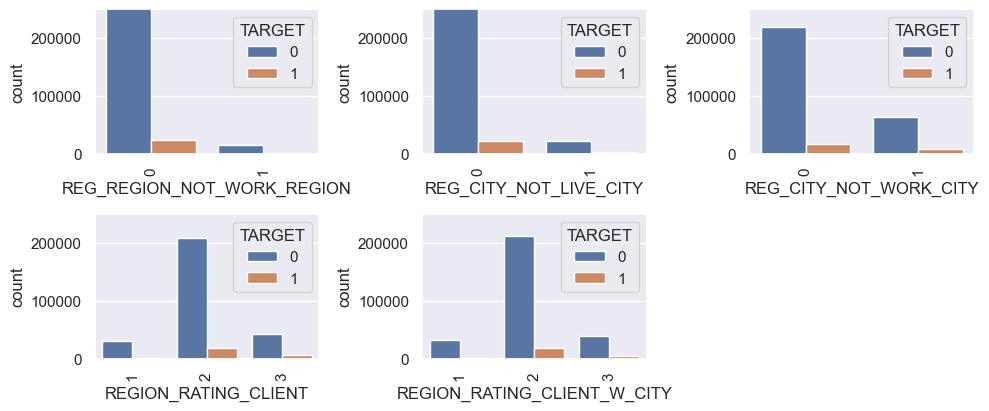

In [74]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(['REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']):
    plt.subplot(5, 3, i+1, ylim=(0, 250000))
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=application_data_df[j], 
                  hue=application_data_df["TARGET"])
    plt.xticks(rotation=90)
    plt.tight_layout()